In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
file = open('BerkeleyEarth_GlobalLandTemperature.csv')
read=csv.reader(file)
data = list(read)
file.close()
y=[]
m=[]
m_temp=[]
m_unc=[]
y_temp=[]
y_unc=[]
y5_temp=[]
y5_unc=[]
y10_temp=[]
y10_unc=[]
y20_temp=[]
y20_unc=[]
for i in data:
    y.append(i[0])
    m.append(i[1])
    m_temp.append(float(i[2]))
    m_unc.append(float(i[3]))
    y_temp.append(float(i[4]))
    y_unc.append(float(i[5]))
    y5_temp.append(float(i[6]))
    y5_unc.append(float(i[7]))
    y10_temp.append(float(i[8]))
    y10_unc.append(float(i[9]))
    y20_temp.append(float(i[10]))
    y20_unc.append(float(i[11]))


In [3]:
y_modified=[]
m = 0
for i in y:
    a = float(i) + m/12
    y_modified.append(a)
    m+=1
    if m==12:
        m = 0

Because ploting all data is too messy, I print only 3 years first to show I know how to print a Error bar plot. 


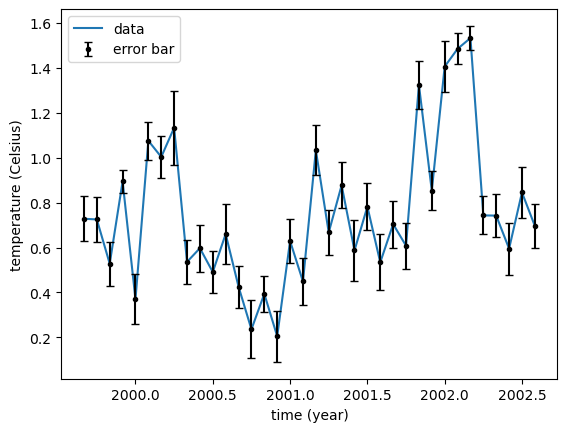

In [4]:
y_modified_np=np.array(y_modified)
m_temp_np=np.array(m_temp)
m_unc_np=np.array(m_unc)
b=2000
l=36
#plt.fill_between(y_modified[:50], m_temp_np[:50]+m_unc_np[:50],m_temp_np[:50]-m_unc_np[:50])
plt.plot(y_modified[b:b+l],m_temp[b:b+l], label='data')
plt.errorbar(y_modified[b:b+l], m_temp[b:b+l], yerr=m_unc[b:b+l], xerr=None, fmt='.k', capsize=3, label='error bar')
plt.xlabel("time (year)")
plt.ylabel("temperature (Celsius)")
plt.legend()
print("Because ploting all data is too messy, I print only 3 years first to show I know how to print a Error bar plot. ")

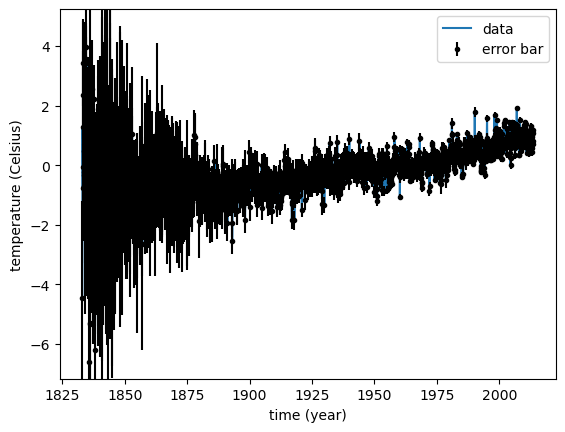

In [6]:
plt.plot(y_modified,m_temp, label='data')
plt.errorbar(y_modified, m_temp, yerr=m_unc, xerr=None, fmt='.k', capsize=0,label='error bar')
plt.xlabel("time (year)")
plt.ylabel("temperature (Celsius)")
plt.legend()

In [7]:
# mark NaN in m_unc
m_unc[60]=1000
m_unc[126]=1000
m_unc[127]=1000
m_unc[144]=1000

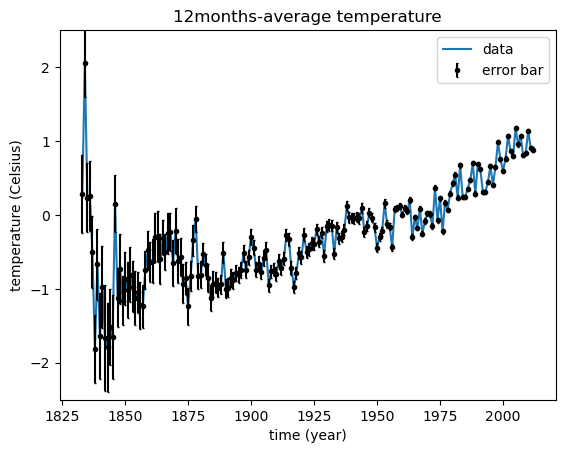

In [8]:
# weighted mean and the error
i = 0
st = 0 # the temporary sum of temperature
su = 0 # the temporary sum of uncertanty
weighted_mean=[]
asso_error=[]
for t in m_temp:
    if m_unc[i]<999:        # skip NaN
        u = 1/m_unc[i]**2
        su = su + u
        st = st + t*u
    if i%12==11:
        weighted_mean.append(st/su)
        asso_error.append((1/su)**0.5)
        st = 0
        su = 0
    i+=1
    
y_integer = np.linspace(1833,2012,180)

plt.plot(y_integer, weighted_mean,label='data')
plt.errorbar(y_integer, weighted_mean, yerr = asso_error, fmt='.k', capsize=1,label='error bar')
plt.ylim(-2.5, 2.5)
plt.xlabel("time (year)")
plt.ylabel("temperature (Celsius)")
plt.title("12months-average temperature")
plt.legend()
# 60 126 127 144

I plot the average temperature from 1833 to 1843 at x = 1843


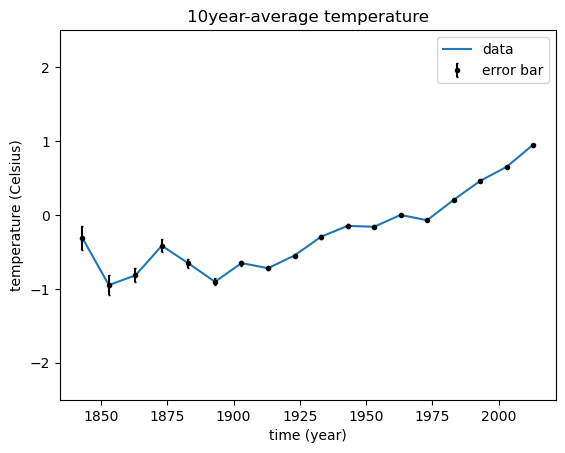

In [22]:
#modify the above code to calculate the 10 years average
weighted_10mean=[]
asso_10error=[]
i = 0
st = 0 # the temporary sum of temperature
su = 0 # the temporary sum of uncertanty
for t in weighted_mean:
    if asso_error[i]<999:        # slip NaN
        u = 1/asso_error[i]**2
        su = su + u
        st = st + t*u
    if i%10==9:
        weighted_10mean.append(st/su)
        asso_10error.append((1/su)**0.5)
        st = 0
        su = 0
    i+=1
y_10integer = np.linspace(1843,2013,18)

plt.plot(y_10integer, weighted_10mean, label='data')
plt.errorbar(y_10integer, weighted_10mean, yerr = asso_10error, fmt='.k', capsize=1, label='error bar')
plt.ylim(-2.5, 2.5)
plt.xlabel("time (year)")
plt.ylabel("temperature (Celsius)")
plt.title("10year-average temperature")
plt.legend()
print("I plot the average temperature from 1833 to 1843 at x = 1843")